In [2]:
import numpy as np
import scipy.stats
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Styling
# make figures bigger
mpl.rcParams['figure.figsize'] = 15, 8
mpl.rc("savefig", dpi=360)

# change grid line styling
mpl.rcParams['grid.color'] = '#d6dbdf'
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.linewidth'] = 0.5

# make markers smaller
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['axes.edgecolor'] = '#d6dbdf'
mpl.rcParams['xtick.color'] = '#d6dbdf'
mpl.rcParams['ytick.color'] = '#d6dbdf'

# change font
mpl.rcParams['font.family'] = 'Open Sans'

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=['#2471A3', '#7FB3D5'])

# define colors for republican and democrat
rep_color='#e74c3c'
dem_color='#3498db'

# Function to apply styling that can't be set default with mpl.rcParams
def apply_styling(grid='both'):
    plt.xticks(color='k')
    plt.yticks(color='k')
    if grid:
        plt.grid(axis=grid)
        
def plot_normal_distribution(mean, std, r=7):
    x_space = np.linspace(-r, r, 2000)
    plt.plot(x_space, scipy.stats.norm.pdf(x_space, mean, std))
    apply_styling()
    plt.show()
    
def calculate_z_score(x_bar, mu, std, n):
    return (x_bar - mu) / (std / np.sqrt(n))

# $\mu$ - population mean (average)
# $\sigma$ - population standard deviation (average deviation from the mean)
# $\sigma^2$ - population variance (squared standard deviation)
<hr>

# $\bar{x}$ - sample mean (average)
# $s$ - sample standard deviation (average deviation from the mean)
# $s^2$ - sample population variance (squared standard deviation)

C:\Users\Jonathan\Anaconda3\envs\snowflake\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


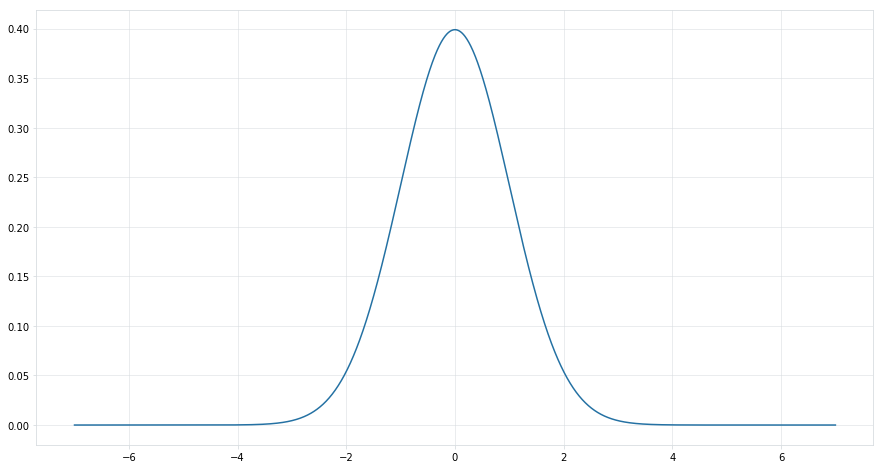

In [3]:
plot_normal_distribution(0, 1)

In [4]:
test_scores = np.array([68, 30, 99, 20, 38, 56, 93, 83, 75, 78])
sample_test_scores = test_scores[:3]

print(f'population test scores: {test_scores}')
print(f'mean: {test_scores.mean()}')
print(f'std: {test_scores.std()}')
print()

print(f'sample test scores: {sample_test_scores}')
print(f'sample mean: {sample_test_scores.mean()}')
print(f'sample std: {sample_test_scores.std()}')

population test scores: [68 30 99 20 38 56 93 83 75 78]
mean: 64.0
std: 25.67489045740994

sample test scores: [68 30 99]
sample mean: 65.66666666666667
sample std: 28.21740991342441


So we have an estimator $\bar{x}$ for the population mean. 

It is an unbiased estimator because $E(\bar{x}) = \mu$ which means that if we get a lot of $\bar{x}$s and average them, then they will equal to the population mean. Here's an example:

In [5]:
samples = np.random.choice(test_scores, (20, 3))
samples

array([[83, 20, 38],
       [68, 93, 56],
       [68, 20, 38],
       [30, 38, 75],
       [68, 83, 20],
       [68, 99, 38],
       [93, 68, 93],
       [68, 78, 99],
       [93, 83, 75],
       [93, 93, 83],
       [75, 68, 20],
       [20, 38, 75],
       [83, 83, 78],
       [78, 78, 20],
       [93, 30, 99],
       [83, 99, 68],
       [93, 38, 99],
       [30, 38, 83],
       [75, 93, 78],
       [78, 68, 56]])

In [6]:
samples.mean(axis=1, keepdims=True)

array([[47.        ],
       [72.33333333],
       [42.        ],
       [47.66666667],
       [57.        ],
       [68.33333333],
       [84.66666667],
       [81.66666667],
       [83.66666667],
       [89.66666667],
       [54.33333333],
       [44.33333333],
       [81.33333333],
       [58.66666667],
       [74.        ],
       [83.33333333],
       [76.66666667],
       [50.33333333],
       [82.        ],
       [67.33333333]])

In [7]:
samples.mean()

67.31666666666666

In [8]:
names = ['Alice', 'Amy', 'Aaron', 'Apricot', 'Brian', 'Carol', 'Carl', 'Leon', 'Josh', 'Jonathan']
d = dict(zip(names, test_scores))
d

{'Alice': 68,
 'Amy': 30,
 'Aaron': 99,
 'Apricot': 20,
 'Brian': 38,
 'Carol': 56,
 'Carl': 93,
 'Leon': 83,
 'Josh': 75,
 'Jonathan': 78}

In [9]:
biased_samples = np.random.choice(test_scores[:4], (20, 3))
biased_samples

array([[99, 99, 30],
       [30, 68, 99],
       [99, 30, 99],
       [30, 99, 30],
       [68, 30, 20],
       [30, 20, 20],
       [30, 20, 30],
       [68, 20, 68],
       [30, 20, 30],
       [20, 20, 30],
       [20, 20, 30],
       [99, 99, 99],
       [20, 99, 20],
       [30, 68, 30],
       [30, 99, 20],
       [99, 99, 99],
       [20, 20, 20],
       [99, 30, 20],
       [99, 99, 30],
       [30, 30, 68]])

In [10]:
biased_samples.mean()

50.516666666666666

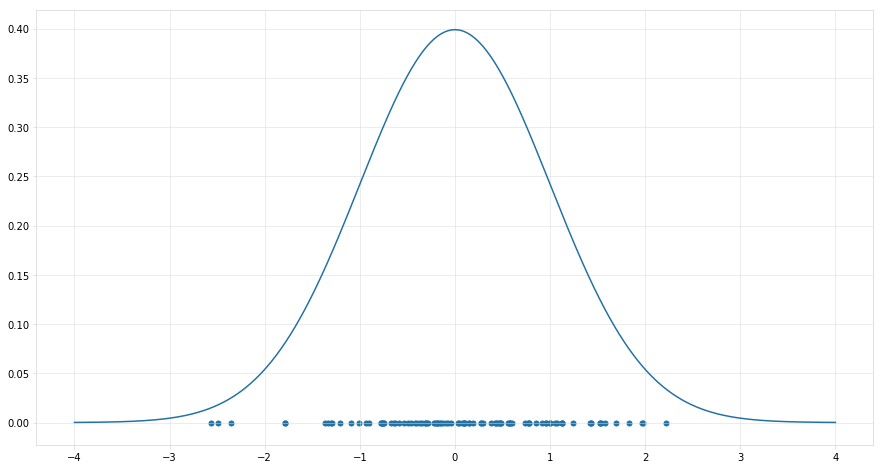

In [11]:
n = 100

random_samples = np.random.randn(n)
Y = np.zeros(n)

x_space = np.linspace(-4, 4, 2000)
plt.plot(x_space, scipy.stats.norm.pdf(x_space, 0, 1))
plt.scatter(random_samples, Y, marker='.', s=100)
apply_styling()
plt.show()

C:\Users\Jonathan\Anaconda3\envs\snowflake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


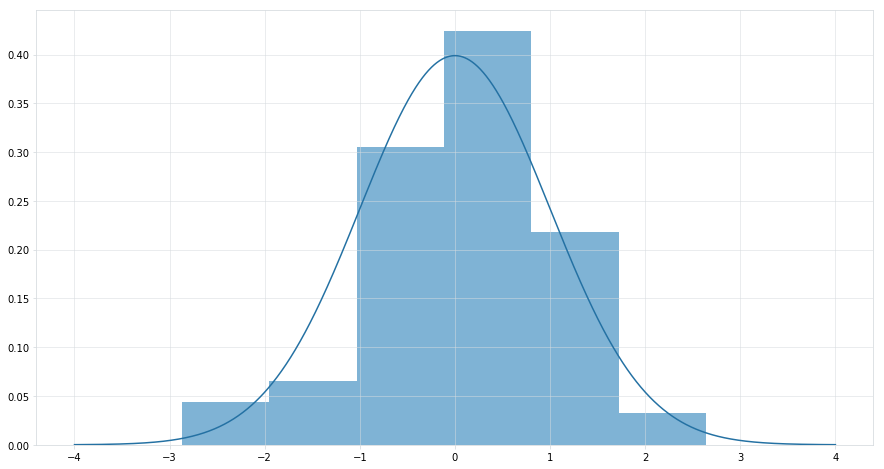

In [12]:
n = 100

random_samples = np.random.randn(n)
Y = np.zeros(n)

x_space = np.linspace(-4, 4, 2000)
plt.plot(x_space, scipy.stats.norm.pdf(x_space, 0, 1))
plt.hist(random_samples, normed=True, bins=6)
apply_styling()
plt.show()

In [13]:
random_samples[:20].mean()

0.35297526781855126

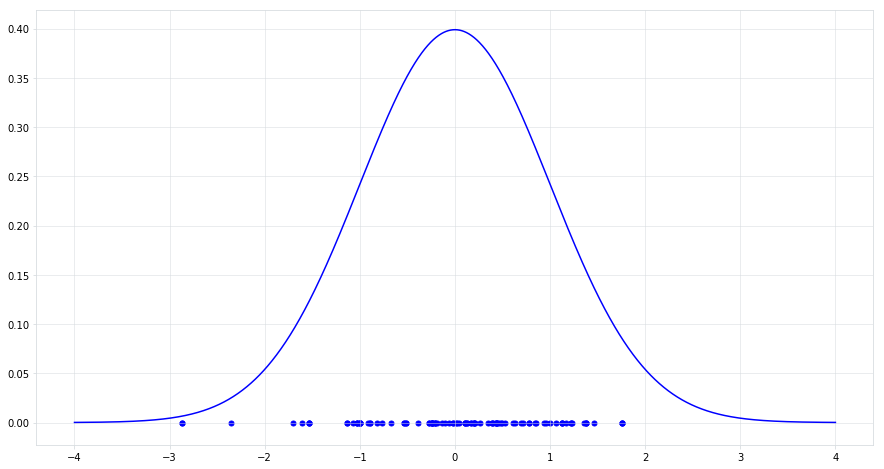

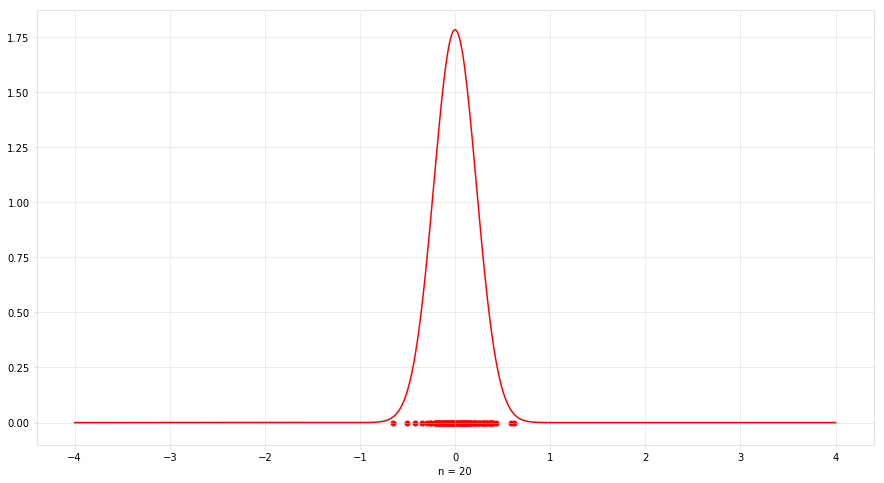

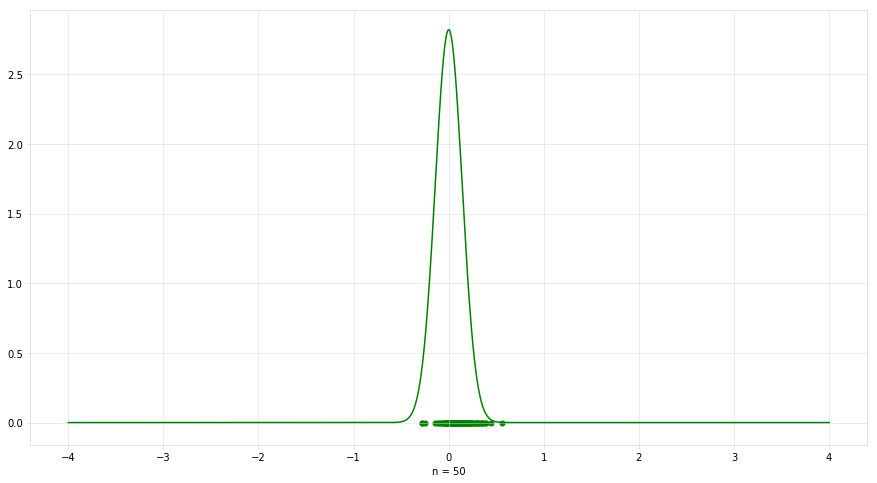

In [14]:
rs = np.random.choice(random_samples, (100, 1)).mean(axis=1)
rs_20 = np.random.choice(random_samples, (100, 20)).mean(axis=1)
rs_50 = np.random.choice(random_samples, (100, 50)).mean(axis=1)

x_space = np.linspace(-4, 4, 2000)
plt.plot(x_space, scipy.stats.norm.pdf(x_space, 0, 1), color='b')
plt.scatter(rs, Y, marker='.', s=100,  color='b')
apply_styling()
plt.show()

plt.plot(x_space, scipy.stats.norm.pdf(x_space, 0, 1 / np.sqrt(20)), color='r')
plt.scatter(rs_20, Y, marker='.', s=100,  color='r')
plt.xlabel('n = 20')
apply_styling()
plt.show()


plt.plot(x_space, scipy.stats.norm.pdf(x_space, 0, 1 / np.sqrt(50)), color='g')
plt.scatter(rs_50, Y, marker='.', s=100,  color='g')
plt.xlabel('n = 50')
apply_styling()
plt.show()

<img src='http://homeworkfactory.com/wp-content/uploads/2017/02/normal2.jpg'>

## Let's say I have students scores on a test. The population mean $\mu$ is 70 and the standard deviation $\sigma$ is 16. Find a confidence 95% interval for a students score on the test.

# $\mu = 70, \sigma = 16$

<img src='https://d2jmvrsizmvf4x.cloudfront.net/BBQ8RTjQpG2XCwPoFXUg_NormalDist1.96.png'>

A confidence interval is basically saying: If we take a sample with size $n$, what are the range of values we can expect the sample mean $\bar{x}$ to take? 

To solve this question, we should take a step back and understand something called the **Z-test**. 

## Z-test
A Z-test tells us: given a population mean and a standard deviation, if I have a sample mean $\bar{x}$, what is the probability of getting that sample mean? We often use this test when doing an experiment, to see if a sample mean is different from the population mean.

Example: Let's say I have a drug that I feed to 10 patients. Their average height is then $\bar{x} = 180$ centimeters.
The average height for humans is $\mu=160$ and the standard deviation is $\sigma=15$. Did my drug work?

We should "standardize" our variable. Whenever we have a normally distributed variable, we can change it to become a "standard normal variable" which means it has mean of 0 and standard deviation of 1.

### We want $\mu=0$ and $\sigma=1$

Why is this useful? Because we know a lot about the "standard normal distribution", which is just the normal distribution with mean 0 and standard deviation 1. So if we can turn our variable to a standard normal variable, we can easily find the range of values for our standard distribution. 

We often denote a standard normal distributed variable as $Z$, so when we turn our variable $X$ to a standard normal variable, we get what's called a $Z$-score.

So, let's say that $X$ is a **random variable that is normally distributed** with mean $\mu$ and standard deviation $\sigma$.

Using the formula:

# $Z = \frac{x - \mu}{\sigma}$

We can turn X into a standard normal variable. However, in this case, we want to see whether our sample mean is different from the population mean. We know because of **central limit theorem** that all sample means $\bar{x}$ come from a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$

To get a Z-score for the sample mean $\bar{x}$, we use the following:

# $Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

So plugging in:
$\bar{x} = 180;n=10;\mu=160;\sigma=15$ 

# $Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{180 - 160}{\frac{15}{\sqrt{10}}} = 4.216$

So our **Z-Score** is $4.216$.

Well, our drug seems to have worked!


$\bar{x} = 170;n=10;\mu=160;\sigma=15$ 

# $Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{170 - 160}{\frac{15}{\sqrt{10}}} = 2.108$

# $P(z \le Z) = 98.54\%$
$\bar{x} = 170;n=10;\mu=150;\sigma=15$ 

<img src='./paint1.png'>

<img src='./paint2.png'>

# $\bar{x} = 150;n=10;\mu=160;\sigma=15$

Now, the confidence interval can be found by setting a **Z-score** that we want to find, and finding which $\bar{x}$ values will give us that **Z-score**. 

<img src='paint3.png'>

Another way to use confidence intervals is to find the **population mean** $\mu$ given a sample. Here, let's say a new example.

### Let's say I have 15 baby elephants. I measure their mean trunk sizes to be $70$ cm with standard deviation of $8$ cm. Using an $\alpha$ value of $0.05$, find a confidence interval for the population mean trunk size.

### $\bar{x} = 70$

### $s = 8$

### $n = 15$

### $\alpha = 0.05$

<img src='paint4.png'>
<img src='paint5.png'>

<img src='paint6.png'>

## T-distribution
<img src='http://ci.columbia.edu/ci/premba_test/c0331/images/s7/6317178747.gif'>

<img src='paint7.jpg'>

# Chapter 9: Hypothesis Testing

### 1. State the hypothesis to be tested.
### 2. Specify an $\alpha$ value which will determine whether to accept or reject our hypothesis.
### 3. Collect your data and perform your statistical test.
### 4. Make a decision.
### 5. Do something?

### Let's say I'm ordering pizza. The restaurant says that they deliver pizza with average time of 30 minutes. I believe that the wait time is longer than 30 minutes. Therefore, I order 25 pizzas, and calculate the average wait time for those pizzas to be 40 minutes, with standard deviation of 14 minutes. With an $\alpha=0.05$, can I say that the average wait time is longer than 30 minutes?

To solve this question, I need to set up my hypothesis statement. This consists of a null hypothesis $H_0$ and an alternative hypothesis $H_1$

## $H_0: \mu \le 30$
## $H_1: \mu \gt 30$
### $\bar{x} = 40; n=25; s=14; \alpha=0.05$
So since we are testing the alternative hypothesis $H_1: \mu \ge 30$, we're going to use a one-tailed test. With an $\alpha = 0.05$ that means if I get some result that's less than 5% to occur, then I will reject the null hypothesis $H_0$. Since I had only sample standard deviation $s$, we use a t-test and find the probabilities. 

In this case, we reject the null hypothesis. 

### p-values:
<img src='paint8.png'>

### If $\alpha \gt p$ reject $H_0$.

### Let's say I want to find whether Computer Science students at my school have the same weight as the rest of my school. I know that people at my school have weight of 70kg on average, and with standard deviation of 15kg. I take 9 computer science students and I weigh them for an average of 78kg. With an $\alpha=0.05$, can I say computer science students have the same weight as the rest of my school?

## $H_0: \mu = 70$

## $H_1: \mu \neq 70$

Our Z-score comes out to be 1.6 which corresponds to a p-value of 0.0548. This means we cannot reject the null hypothesis $H_0$ since $\alpha < p$.

### Type I and Type II Error
<img src='paint9.png'>

## In orange above, I said we can "accept" the null hypothesis $H_0$. In reality, we don't accept the null hypothesis. We can only "fail to reject" the null hypothesis. This means that we never prove the null hypothesis is true. However, we can only fail to disprove it.

# I'm doing a statistical test. If I decrease my $\alpha$ from 0.1 to 0.05, what happens to:
# My Type I error rate? It decreases from 10% to 5%.
# What about my Type II error rate? It will increase. 
# Finally, what happens to the power of my test? It will decrease.

<img src='paint10.png'>

## How does using a two-tailed test vs a one-tailed test affect Type II error? A one-tailed test puts the $\alpha$ on one side, which will reduce the chance for a Type II error! <img src='paint11.png'>

# Chapter 10 - Two Sample T-Tests

## There are 3 kinds of cases when dealing with independent two-sample test:
### 1. "Known variances" where we know $\sigma$. We use $\sigma$ to run our test.
### 2. "Unknown variances, but we assume the two samples have equal variances".  We take the average of the two variances and use that in our test.
### 3. "Unknown variances, assume that the two samples have unequal variances". We just add the two variances and use that in our test.

### I want you to be able to get a word problem, tell me which of the 3 cases above it is, and write the null hypothesis $H_0$ and the alternative hypothesis $H_1$.

## 1. I am exploring Africa jungle. I capture and release 10 monkeys from the West jungle, and 10 monkeys from the East jungle. West jungle monkeys had mean tail length 37cm and standard deviation of 7cm. East jungle monkeys had mean tail length of 32cm and standard deviation of 5cm. Do the East jungle monkeys and West jungle monkeys have equal mean tail length?

### $H_0: \mu_W - \mu_E = 0$
### $H_1: \mu_W - \mu_E \neq 0$

## 2. I am exploring Africa jungle. I want to test whether West jungle monkeys have a longer tail than East jungle monkeys. I capture and release 10 monkeys from the West jungle, and 10 monkeys from the East jungle. West jungle monkeys had mean tail length 37cm and standard deviation of 7cm. East jungle monkeys had mean tail length of 32cm and standard deviation of 5cm. Set up a test to say whether it's true!
### $H_0: \mu_E - \mu_W \ge 0$
### $H_1: \mu_E - \mu_W \lt 0$

## 3. I am animal doctor. I want to test whether corgis have bigger butts poodles. I also think that the variance of their butt sizes are equal. I measure thet butts of 10 corgis and I get a mean of 25cm and std. 4cm. I measure the butts of 21 poodles and I get a mean of 21cm and std. 8cm. Set up a test to say whether my belief that corigs have bigger butts than poodles is correct! Which one of the 3 cases of independent two-sample test is this?
Let's say I have an $\alpha=0.05$

## $H_0: \mu_c - \mu_p \le 0$
## $H_1: \mu_c - \mu_p \gt 0$

Let's say I do this test: which was a left-tailed independent two-sample t-test with equal unknown variances. What do the following p-values mean?

$p=0.04$

Since $p < \alpha$, I can reject the null hypothesis to say that $\mu_c - \mu_p \gt 0$. 


$p=0.08$

## Paired Sample T-test
### This is when our two samples that we're comparing are related to each other. For example, we can have a class's test scores at the start of the semester, and at the end of the semester. They are related because it's the same class, but at different times.

### It happens when we look at the same thing, but at different points in time. For example, looking at my sesame when I was younger, and when I'm older. Or, looking at a patient's health before a treatment, or after a treatment.

### 1. When I was 15, my sesame grew 1 inch every day with std. 0.2 inches. Now, I'm 22, and my sesame grows 1.5 inches every day, with std. 0.5 inches. I want to test that my sesame grows faster when I'm 22 than when I was 15. Is this an independent or paired sample t-test? Also, write the null and alternative hypothesis.

Independent

Left-tailed:
### $H_0: \mu_{old} - \mu_{young} \le 0$

### $H_1: \mu_{old} - \mu_{young} \gt 0$


Right-tailed:
### $H_0: \mu_{young} - \mu_{old} \ge 0$

### $H_1: \mu_{young} - \mu_{old} \lt 0$

### ANOVA and hypothesis testing on proportion is not on the test. No need to memorize formulas. Just conceptual.

### Let's say I am trying to find out the average GPA of students at my university. I pick 30 of my friends and ask them what's your GPA. I average these out and get an estimate for the GPA of students at my university. Is my estimate a biased estimator? Why or why not?

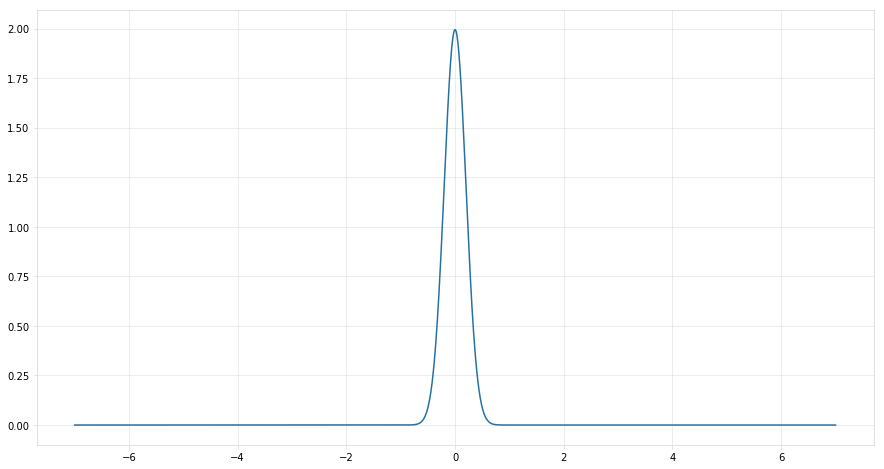

In [57]:
plot_normal_distribution(mean=0, std=0.2)

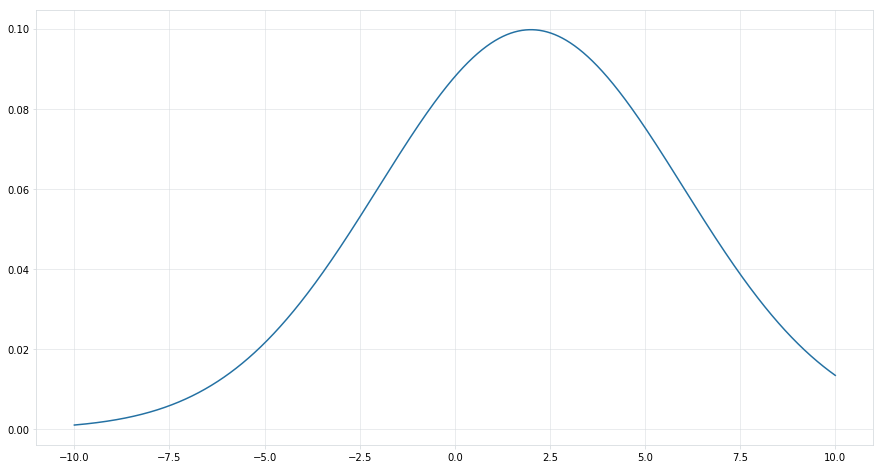

In [145]:
plot_normal_distribution(mean=2, std=4, r=10)